In [1]:
#!pip install matplotlib-venn

In [2]:
import os
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# 사용할 변수
# 1. 분류 기준 : 세 가지 질병 + 정상 상태 
symptoms = ["CNV", "DME", "DRUSEN", "NORMAL"]
# 2. 폴더 경로
path_dirs = {"test_dir": "OCT2017/test/",
             "train_dir":  "OCT2017/train/"}

## Brief.

### 총 파일 수 
- file : 84484

### 폴더별 파일 수 / 유니크 ID 수 
- test file : 1000 / 633
- train file : 83484 / 4590

### 유의사항

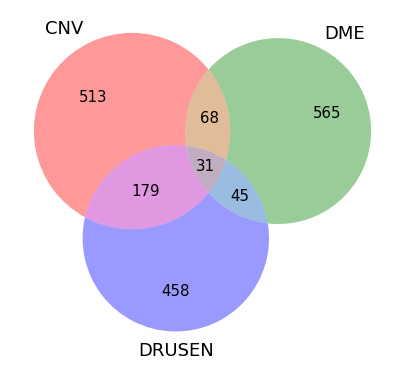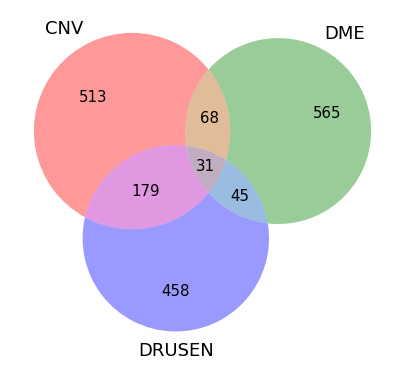

In [7]:
#test 파일 체크 
test_total = []
for name in symptoms : 
    get_list = os.listdir(path_dirs["test_dir"] + name)
    test_total.extend(get_list)
len(test_total)

1000

In [8]:
#train 폴더 체크 
train_total = []
for name in symptoms : 
    get_list = os.listdir(path_dirs["train_dir"] + name)
    train_total.extend(get_list)
len(train_total)

13620

In [9]:
#test 파일 리스트로 데이터프레임 만들기 
classify = []
patient = []
fileno = []

for name in test_total:
    classify.append(name.split("-")[0])
    patient.append(name.split("-")[1])
    fileno.append(name.split("-")[2].split(".")[0])
    
test_df = pd.DataFrame({"class":classify, "id":patient, "numbers":fileno})
test_df.head()

,class,id,numbers
0,CNV,4283050,2
1,CNV,909994,1
2,CNV,5861916,2
3,CNV,2959614,4
4,CNV,4974377,1


In [10]:
test_df.groupby("class").count()

,id,numbers
class,,
CNV,250,250
DME,250,250
DRUSEN,250,250
NORMAL,250,250


In [11]:
#train 파일 리스트로 데이터프레임 만들기 
classify = []
patient = []
fileno = []

for name in train_total:
    classify.append(name.split("-")[0])
    patient.append(name.split("-")[1])
    fileno.append(name.split("-")[2].split(".")[0])
    
train_df = pd.DataFrame({"class":classify, "id":patient, "numbers":fileno})
train_df.head()

,class,id,numbers
0,CNV,5557306,155
1,CNV,7159021,147
2,CNV,1188386,464
3,CNV,5557306,33
4,CNV,904464,275


In [12]:
train_des = train_df[["class", "id"]].groupby("class").count()
train_des["percentage"] = round(train_des["id"] / len(train_total), 4) *100 
train_des

,id,percentage
class,,
CNV,12344,90.63
DME,912,6.70
DRUSEN,364,2.67


In [10]:
# train 데이터의 환자 수, test 데이터의 환자 수 확인
len(train_df["id"].unique()),len(test_df["id"].unique()) 

(4590, 633)

([], [])

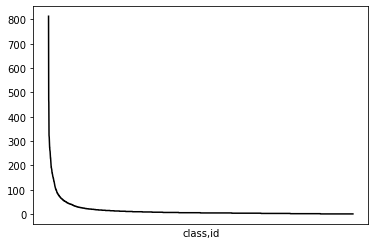

In [11]:
#환자 id 를 기준으로 value_counts -> id당 사진 몇 장인지 확인하기 
#불균형이 엄청 심함 

train_df[["class", "id"]].value_counts().plot(color="black")
plt.xticks(ticks=[])


In [12]:
#max가 813에 달하는 것을 확인할 수 있다 
train_df[["class", "id"]].value_counts().describe()

count    5620.000000
mean       14.854804
std        36.273902
min         1.000000
25%         3.000000
50%         5.000000
75%        12.000000
max       813.000000
dtype: float64

In [13]:
#max가 813에 달하는 것을 확인할 수 있다 
train_df[["class", "id"]].value_counts()

class   id     
CNV     1188386    813
        6652117    613
        6666538    585
        7907754    469
        172472     459
                  ... 
DRUSEN  7930177      1
        79215        1
NORMAL  3781565      1
DRUSEN  7880345      1
DME     8014630      1
Length: 5620, dtype: int64

In [14]:
#train 데이터의 파일 수와 unique id 수 비교 
for name in symptoms:
    uniquenum = len(train_df[train_df["class"] == name]["id"].unique())
    filenum = len(train_df[train_df["class"] == name])
    print(f"{name}/train")
    print(f"number of files: {filenum} <-> number of unique id: {uniquenum}")
    print("------------------------------------------")

CNV/train
number of files: 37205 <-> number of unique id: 791
------------------------------------------
DME/train
number of files: 11348 <-> number of unique id: 709
------------------------------------------
DRUSEN/train
number of files: 8616 <-> number of unique id: 713
------------------------------------------
NORMAL/train
number of files: 26315 <-> number of unique id: 3407
------------------------------------------


In [15]:
#test 데이터의 파일 수와 unique id 수 비교 
for name in symptoms:
    uniquenum = len(test_df[test_df["class"] == name].id.unique())
    filenum = len(test_df[test_df["class"] == name])
    print(f"{name}/test")
    print(f"number of files: {filenum} <-> number of unique id: {uniquenum}")
    print("------------------------------------------")



CNV/test
number of files: 250 <-> number of unique id: 129
------------------------------------------
DME/test
number of files: 250 <-> number of unique id: 166
------------------------------------------
DRUSEN/test
number of files: 250 <-> number of unique id: 142
------------------------------------------
NORMAL/test
number of files: 250 <-> number of unique id: 220
------------------------------------------


In [16]:
cnvid = list(train_df[train_df["class"] == "CNV"].id)
dmeid = list(train_df[train_df["class"] == "DME"].id)
drusenid = list(train_df[train_df["class"] == "DRUSEN"].id)

print("only CNV : ", len(set(cnvid) - set(dmeid) - set(drusenid)))
print("only DME : ", len(set(dmeid) - set(cnvid) - set(drusenid)))
print("only DRUSEN : ", len(set(drusenid) - set(dmeid) - set(cnvid)))
print("intersection between cnv and dme : ", len(set(cnvid) & set(dmeid) - set(drusenid)))
print("intersection between cnv and drusen : ", len(set(cnvid) & set(drusenid) - set(dmeid)))
print("intersection between drusen and dme : ", len(set(drusenid) & set(dmeid) - set(cnvid)))
print("ALL : ", len(set(drusenid) & set(dmeid) & set(cnvid)))

only CNV :  513
only DME :  565
only DRUSEN :  458
intersection between cnv and dme :  68
intersection between cnv and drusen :  179
intersection between drusen and dme :  45
ALL :  31


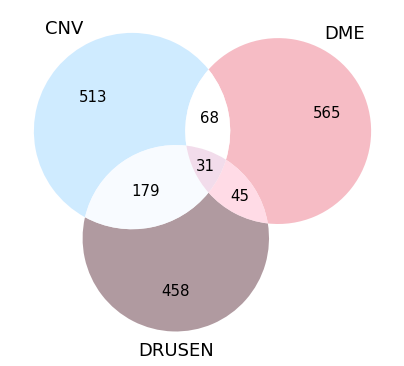

In [17]:
# Make the venn-diagram
plt.figure(figsize=(7, 7))
plt.rc('font', size=15)

venn3(subsets = (513, 565, 68, 458, 179, 45, 31), 
     set_labels = ("CNV", "DME", "DRUSEN"),
     set_colors=('#c4e6ff', '#F4ACB7','#9D8189'), 
     alpha = 0.8)
plt.show()

In [18]:
(set(drusenid) & set(dmeid) & set(cnvid))

{'1169820',
 '1356232',
 '1641792',
 '1860310',
 '2097858',
 '2205167',
 '224974',
 '3413998',
 '4450592',
 '4921138',
 '5380819',
 '5851527',
 '6116901',
 '6695669',
 '7585537',
 '7658334',
 '7675318',
 '7731545',
 '7736035',
 '7843891',
 '7860515',
 '8014630',
 '8178466',
 '8549730',
 '8605472',
 '8869683',
 '9201573',
 '9510741',
 '9540117',
 '9642260',
 '9734808'}

In [24]:
train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() >= 100]

class  id     
CNV    1188386    813
       6652117    613
       6666538    585
       7907754    469
       172472     459
                 ... 
       6604414    102
DME    258763     101
CNV    8972369    101
       1390155    101
       1963682    100
Length: 140, dtype: int64

In [25]:
train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() >= 50]

class   id     
CNV     1188386    813
        6652117    613
        6666538    585
        7907754    469
        172472     459
                  ... 
NORMAL  7027665     50
CNV     4455032     50
        7961716     50
        6783162     50
        7314763     50
Length: 332, dtype: int64

In [27]:
len(train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() >= 200])

46

In [28]:
train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() <= 100]

class   id     
CNV     1963682    100
        6795779     99
        3618489     99
        9547888     99
        4691762     98
                  ... 
DRUSEN  7930177      1
        79215        1
NORMAL  3781565      1
DRUSEN  7880345      1
DME     8014630      1
Length: 5481, dtype: int64

In [29]:
train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() == 1]

class   id     
NORMAL  918334     1
DME     5822041    1
DRUSEN  2456398    1
NORMAL  4537543    1
        4565369    1
                  ..
DRUSEN  7930177    1
        79215      1
NORMAL  3781565    1
DRUSEN  7880345    1
DME     8014630    1
Length: 601, dtype: int64

In [53]:
sampling = pd.DataFrame(train_df[["class", "id"]].value_counts()[train_df[["class", "id"]].value_counts() > 100])

In [54]:
sampling.reset_index(inplace=True)

In [55]:
sampling.rename(columns={0:"number"}, inplace=True)

In [56]:
sampling.head()

,class,id,number
0,CNV,1188386,813
1,CNV,6652117,613
2,CNV,6666538,585
3,CNV,7907754,469
4,CNV,172472,459


In [36]:
sample_class = sampling["class"]
sample_id = sampling["id"]
sampling.rename(columns={0:"number"}, inplace=True)

In [39]:
len(sample_class) == len(sample_id)

True

In [41]:
len(train_total)

83484

In [66]:
sampling["sampling"] = sampling["number"].apply(sampleno)

In [65]:
import random
random.seed(77)

def sampleno(x):
    return random.sample(list(range(x)), 100)

In [67]:
sampling.head()

,class,id,number,sampling
0,CNV,1188386,813,"[258, 333, 202, 246, 197, 117, 299, 487, 571, ..."
1,CNV,6652117,613,"[543, 94, 17, 497, 361, 425, 589, 0, 63, 492, ..."
2,CNV,6666538,585,"[61, 528, 385, 88, 307, 80, 368, 464, 5, 48, 4..."
3,CNV,7907754,469,"[468, 195, 457, 86, 197, 198, 444, 283, 219, 3..."
4,CNV,172472,459,"[424, 286, 406, 109, 142, 179, 155, 26, 379, 2..."


In [76]:
for i in [0, 1]:
    dummy1 = sampling.loc[i]["class"]
    dummy2 = sampling.loc[i]["id"]
    
    for fileno in sampling.loc[i]["sampling"]:
        print(dummy1 + "-" + dummy2 + "-" + str(fileno) + ".jpeg")

CNV-1188386-258.jpeg
CNV-1188386-333.jpeg
CNV-1188386-202.jpeg
CNV-1188386-246.jpeg
CNV-1188386-197.jpeg
CNV-1188386-117.jpeg
CNV-1188386-299.jpeg
CNV-1188386-487.jpeg
CNV-1188386-571.jpeg
CNV-1188386-626.jpeg
CNV-1188386-243.jpeg
CNV-1188386-148.jpeg
CNV-1188386-569.jpeg
CNV-1188386-645.jpeg
CNV-1188386-676.jpeg
CNV-1188386-512.jpeg
CNV-1188386-2.jpeg
CNV-1188386-286.jpeg
CNV-1188386-29.jpeg
CNV-1188386-509.jpeg
CNV-1188386-176.jpeg
CNV-1188386-195.jpeg
CNV-1188386-519.jpeg
CNV-1188386-397.jpeg
CNV-1188386-187.jpeg
CNV-1188386-339.jpeg
CNV-1188386-329.jpeg
CNV-1188386-120.jpeg
CNV-1188386-89.jpeg
CNV-1188386-564.jpeg
CNV-1188386-266.jpeg
CNV-1188386-546.jpeg
CNV-1188386-480.jpeg
CNV-1188386-209.jpeg
CNV-1188386-231.jpeg
CNV-1188386-196.jpeg
CNV-1188386-73.jpeg
CNV-1188386-82.jpeg
CNV-1188386-204.jpeg
CNV-1188386-713.jpeg
CNV-1188386-573.jpeg
CNV-1188386-448.jpeg
CNV-1188386-609.jpeg
CNV-1188386-721.jpeg
CNV-1188386-551.jpeg
CNV-1188386-78.jpeg
CNV-1188386-102.jpeg
CNV-1188386-724.jpeg

In [69]:
sampling.loc[0]

class                                                     CNV
id                                                    1188386
number                                                    813
sampling    [258, 333, 202, 246, 197, 117, 299, 487, 571, ...
Name: 0, dtype: object

In [75]:
train_total

['CNV-5557306-155.jpeg',
 'CNV-163081-153.jpeg',
 'CNV-3537912-28.jpeg',
 'CNV-7159021-147.jpeg',
 'CNV-8087608-23.jpeg',
 'CNV-398897-1.jpeg',
 'CNV-457907-44.jpeg',
 'CNV-1188386-464.jpeg',
 'CNV-7555604-29.jpeg',
 'CNV-6851127-21.jpeg',
 'CNV-154835-56.jpeg',
 'CNV-5557306-33.jpeg',
 'CNV-904464-275.jpeg',
 'CNV-8833506-70.jpeg',
 'CNV-8184974-56.jpeg',
 'CNV-7513011-204.jpeg',
 'CNV-1016042-68.jpeg',
 'CNV-2724152-100.jpeg',
 'CNV-6543588-13.jpeg',
 'CNV-6652117-372.jpeg',
 'CNV-6581164-193.jpeg',
 'CNV-5054419-187.jpeg',
 'CNV-8833506-112.jpeg',
 'CNV-9297624-139.jpeg',
 'CNV-7732521-130.jpeg',
 'CNV-6314049-107.jpeg',
 'CNV-4951152-71.jpeg',
 'CNV-7683197-64.jpeg',
 'CNV-457907-3.jpeg',
 'CNV-9642260-192.jpeg',
 'CNV-1997439-161.jpeg',
 'CNV-328435-3.jpeg',
 'CNV-1908313-27.jpeg',
 'CNV-4732594-37.jpeg',
 'CNV-4612183-15.jpeg',
 'CNV-2582297-2.jpeg',
 'CNV-794538-97.jpeg',
 'CNV-1651625-44.jpeg',
 'CNV-5429703-79.jpeg',
 'CNV-9059536-1.jpeg',
 'CNV-9642260-59.jpeg',
 'CNV-4086623